In [2]:

# File for machine learning model - Linear Regression

import os
import pandas as pd
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dataname = "linear_regression"

DATA_PATH = "../../Datasets/Vehice dataset/Downsampled/Test/test_sampled.csv"
OUTPUT_PATH = f"../../Datasets/Evaluations/Regression/{dataname}.csv"

TEST_PATH = "../../Datasets/Vehice dataset/Downsampled/Test/test_sampled.csv"
TRAIN_PATH = "../../Datasets/Vehice dataset/Downsampled/Train/train.csv"
VALID_PATH = "../../Datasets/Vehice dataset/Downsampled/Valid/valid.csv"




In [3]:
df_samples = pd.read_csv(DATA_PATH)
df_test = pd.read_csv(DATA_PATH)
df_train = pd.read_csv(TRAIN_PATH)

df_test.drop(columns=['prediction', 'prompt'], inplace=True)
df_samples.drop(columns=['prediction', 'prompt'], inplace=True)
print(df_samples.head())

                                    name  year  selling_price  km_driven  \
0     Ford Figo Aspire 1.5 TDCi Titanium  2017         670000      70000   
1  Mahindra Scorpio VLX 2WD AIRBAG BSIII  2012         525000     120000   
2                 Maruti Swift Dzire VDI  2014         438999      81000   
3              Ford Figo Diesel Titanium  2010         144000      50000   
4                 Hyundai i10 Magna 1.1L  2008         185000     110000   

     fuel seller_type transmission                 owner     mileage   engine  \
0  Diesel  Individual       Manual           First Owner  25.83 kmpl  1498 CC   
1  Diesel  Individual       Manual           First Owner  12.05 kmpl  2179 CC   
2  Diesel      Dealer       Manual           First Owner   23.4 kmpl  1248 CC   
3  Diesel  Individual       Manual          Second Owner   20.0 kmpl  1399 CC   
4  Petrol  Individual       Manual  Fourth & Above Owner  19.81 kmpl  1086 CC   

   max_power               torque  seats  
0     99 bhp 

In [4]:

df_samples = df_samples.dropna(how='any')

df_samples['prediction'] = None
df_samples["prompt"] = f'{dataname}'
df_samples["prompt_name"] = f'{dataname}'
df_samples["model_name"] = f'{dataname}'


In [5]:
def pre_process(df):
    df['year'] = 2020 - df['year']
    df['mileage'] = df['mileage'].str.replace(' kmpl', '', regex=False)
    df['mileage'] = df['mileage'].str.replace(' km/kg', '', regex=False)
    df['mileage'] = pd.to_numeric(df['mileage'])

    df['engine'] = df['engine'].str.replace(' CC', '', regex=False)
    df['engine'] = pd.to_numeric(df['engine'])


    df['max_power'] = df['max_power'].str.replace(' bhp', '', regex=False)
    df['max_power'] = pd.to_numeric(df['max_power'])
    
    df = df.dropna(how='any')
    return df

df_train = pre_process(df_train)
df_test = pre_process(df_test)

print(df_samples.head())

                                    name  year  selling_price  km_driven  \
0     Ford Figo Aspire 1.5 TDCi Titanium  2017         670000      70000   
1  Mahindra Scorpio VLX 2WD AIRBAG BSIII  2012         525000     120000   
2                 Maruti Swift Dzire VDI  2014         438999      81000   
3              Ford Figo Diesel Titanium  2010         144000      50000   
4                 Hyundai i10 Magna 1.1L  2008         185000     110000   

     fuel seller_type transmission                 owner     mileage   engine  \
0  Diesel  Individual       Manual           First Owner  25.83 kmpl  1498 CC   
1  Diesel  Individual       Manual           First Owner  12.05 kmpl  2179 CC   
2  Diesel      Dealer       Manual           First Owner   23.4 kmpl  1248 CC   
3  Diesel  Individual       Manual          Second Owner   20.0 kmpl  1399 CC   
4  Petrol  Individual       Manual  Fourth & Above Owner  19.81 kmpl  1086 CC   

   max_power               torque  seats prediction     

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train = df_train.drop('selling_price', axis=1)
y_train = df_train['selling_price']
X_test = df_test.drop('selling_price', axis=1)
y_test = df_test['selling_price']

categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough' 
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_transformed, y_train)

y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")



Training RMSE: 312431.31455321616
Test RMSE: 319730.43086791545
Training R^2: 0.8532686126343211
Test R^2: 0.8048301047122098


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


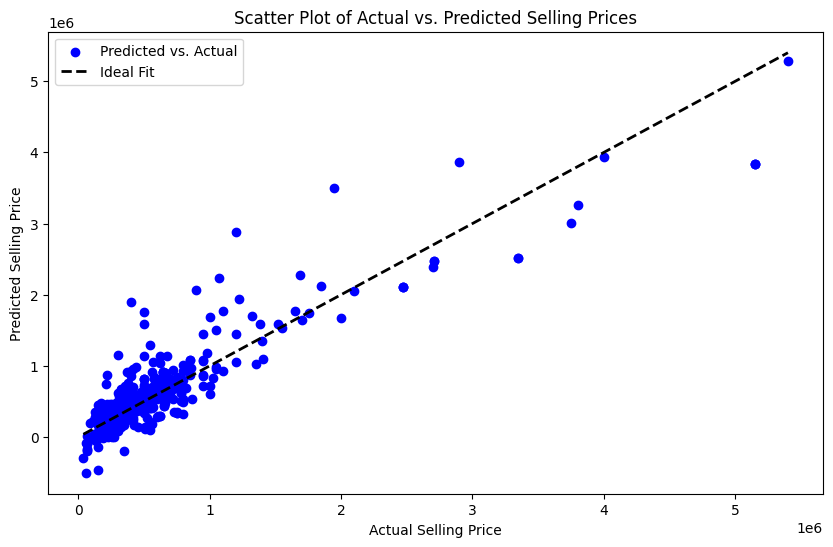

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Scatter Plot of Actual vs. Predicted Selling Prices')
plt.legend()
plt.show()

In [6]:
df_samples['prediction'] = y_test_pred

In [7]:
print(df_samples.head())

                                    name  year  selling_price  km_driven  \
0     Ford Figo Aspire 1.5 TDCi Titanium  2017         670000      70000   
1  Mahindra Scorpio VLX 2WD AIRBAG BSIII  2012         525000     120000   
2                 Maruti Swift Dzire VDI  2014         438999      81000   
3              Ford Figo Diesel Titanium  2010         144000      50000   
4                 Hyundai i10 Magna 1.1L  2008         185000     110000   

     fuel seller_type transmission                 owner     mileage   engine  \
0  Diesel  Individual       Manual           First Owner  25.83 kmpl  1498 CC   
1  Diesel  Individual       Manual           First Owner  12.05 kmpl  2179 CC   
2  Diesel      Dealer       Manual           First Owner   23.4 kmpl  1248 CC   
3  Diesel  Individual       Manual          Second Owner   20.0 kmpl  1399 CC   
4  Petrol  Individual       Manual  Fourth & Above Owner  19.81 kmpl  1086 CC   

   max_power               torque  seats     prediction 

In [8]:
df_samples.to_csv(OUTPUT_PATH, index=False)


In [22]:

num_onehot_cols = sum([len(list(preprocessor.named_transformers_['onehot']
                                .categories_[i]))
                       for i in range(len(categorical_features))])

start_of_numerical = num_onehot_cols

total_coeffs = len(model.coef_)

coeff_numerical = model.coef_[start_of_numerical:total_coeffs]

numerical_features = [col for col in df_train.columns if col not in categorical_features + ['selling_price']]

for feature, coeff in zip(numerical_features, coeff_numerical):
    print(f"{feature}: {coeff}")


year: -38479.14151431434
km_driven: -0.3648629767248055
mileage: 19114.769808185523
engine: 153.73219109243212
max_power: 12323.213547117957
seats: -21767.67076070931


In [23]:

feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)

coefficients = model.coef_[:num_onehot_cols] 

coeff_dict = dict(zip(feature_names, coefficients))

top_weights_per_category = {}
for category in categorical_features:
    category_coeffs = {feature: coeff for feature, coeff in coeff_dict.items() if feature.startswith(category)}
    top_weights = sorted(category_coeffs.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
    top_weights_per_category[category] = top_weights

for category, weights in top_weights_per_category.items():
    print(f"Category: {category}")
    for feature, weight in weights:
        print(f"  {feature}: {weight}")
    print()


Category: name
  name_BMW X4 M Sport X xDrive20d: 1387368.3490715402
  name_Lexus ES 300h: 402989.08862877754
  name_Volvo XC40 D4 Inscription BSIV: 347102.6590135363
  name_Tata Safari Storme EX: -217773.602622581
  name_Maruti 800 AC: 201662.42634670652

Category: fuel
  fuel_LPG: 61806.58802693046
  fuel_Diesel: -46138.04652824192
  fuel_Petrol: -41119.13278365966
  fuel_CNG: 25450.591284979968

Category: seller_type
  seller_type_Trustmark Dealer: -217852.40761785238
  seller_type_Dealer: 116105.34593741776
  seller_type_Individual: 101747.06168043206

Category: transmission
  transmission_Manual: -227263.91571877588
  transmission_Automatic: 227263.9157187721

Category: owner
  owner_Second Owner: -113670.47041470252
  owner_First Owner: 56883.700194055826
  owner_Test Drive Car: 45518.171886019074
  owner_Fourth & Above Owner: 37333.79434278155
  owner_Third Owner: -26065.196008146508

Category: torque
  torque_400Nm@ 1750-2500rpm: 1347359.8044444255
  torque_59Nm@ 2500rpm: 54071